<a href="https://colab.research.google.com/github/skncode/lp3/blob/main/uberfare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("uber.csv")

In [33]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [35]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [36]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [37]:
df = df.drop(['Unnamed: 0', 'key'],axis = 1)

In [38]:
df.shape

(200000, 7)

In [39]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [40]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [41]:
df["dropoff_longitude"].fillna(value = df["dropoff_longitude"].mean(),inplace=True)
df["dropoff_latitude"].fillna(value=df["dropoff_latitude"].mean(),inplace = True)

In [42]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [43]:
df["pickup_datetime"]

0         2015-05-07 19:52:06 UTC
1         2009-07-17 20:04:56 UTC
2         2009-08-24 21:45:00 UTC
3         2009-06-26 08:22:21 UTC
4         2014-08-28 17:47:00 UTC
                   ...           
199995    2012-10-28 10:49:00 UTC
199996    2014-03-14 01:09:00 UTC
199997    2009-06-29 00:42:00 UTC
199998    2015-05-20 14:56:25 UTC
199999    2010-05-15 04:08:00 UTC
Name: pickup_datetime, Length: 200000, dtype: object

In [44]:
df.pickup_datetime= pd.to_datetime(df.pickup_datetime)

In [45]:
df["pickup_datetime"]

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 200000, dtype: datetime64[ns, UTC]

In [46]:
df['year']= df.pickup_datetime.dt.year
df['month']= df.pickup_datetime.dt.month
df['day']= df.pickup_datetime.dt.day
df['dayofweek']= df.pickup_datetime.dt.dayofweek

In [47]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3


In [49]:
df= df.drop('pickup_datetime',axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3


In [50]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
dayofweek              int64
dtype: object

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
year                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
month                AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
day                     AxesSubplot(0.125,0.345976;0.352273x0.0920732)
dayofweek            AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dtype: object

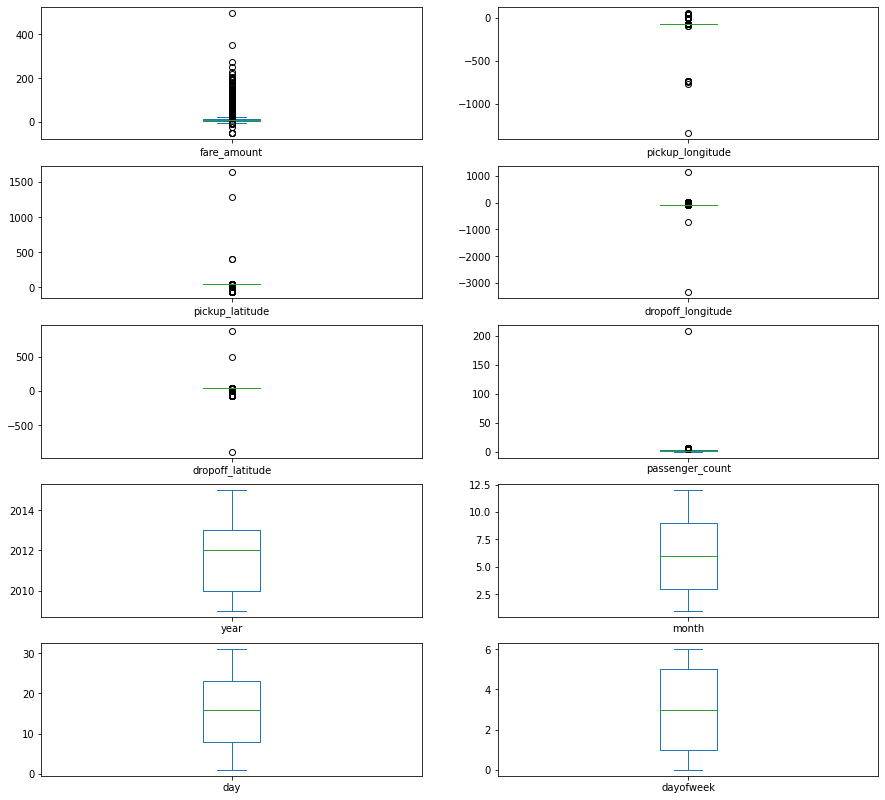

In [57]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))